In [1]:
  !pip install mapclassify

In [2]:
!pip install geopandas

# Libraries

Geopandas: geospatial data in python [https://geopandas.org/en/stable/docs.html]

matplotlib.pyplot: collection of functions that make matplotlib work like MATLAB [https://matplotlib.org/stable/tutorials/pyplot.html]

pandas: Python library specialized in managing and analyzing data structures.

requests: HTTP library

In [15]:
import geopandas as gpd 
import matplotlib.pyplot as plt 
import os
import pandas as pd
import requests

# Set up the workspace

In [16]:
data_folder = 'data'
output_folder = 'output'

if not os.path.exists(data_folder): #hecks if the data folder exists and and creates it if it’s missing.
    os.mkdir(data_folder)
if not os.path.exists(output_folder):
    os.mkdir(output_folder)

# Download file

In [17]:
def download(url): # function to download a file from a given URL
    filename = os.path.join(data_folder, os.path.basename(url))
    if not os.path.exists(filename):
      with requests.get(url, stream=True, allow_redirects=True) as r:
          with open(filename, 'wb') as f:
              for chunk in r.iter_content(chunk_size=8192):
                  f.write(chunk)
      print('Downloaded', filename)

In [18]:
shapefile_name = 'tl_2019_06_tract'
shapefile_exts = ['.shp', '.shx', '.dbf', '.prj']
data_url = 'https://github.com/spatialthoughts/python-dataviz-web/releases/' \
  'download/census/'

for ext in shapefile_exts:
  url = data_url + shapefile_name + ext
  download(url)

csv_name = 'ACSST5Y2019.S0101_data.csv'
download(data_url + csv_name)

Downloaded data\tl_2019_06_tract.shp
Downloaded data\tl_2019_06_tract.shx
Downloaded data\tl_2019_06_tract.dbf
Downloaded data\tl_2019_06_tract.prj
Downloaded data\ACSST5Y2019.S0101_data.csv


## Data Pre-Processing

In [19]:
#Load Shp file into GeoDataFrame
shapefile_path = os.path.join(data_folder, shapefile_name + '.shp')
tracts = gpd.read_file(shapefile_path)
tracts

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,06,037,139301,06037139301,1393.01,Census Tract 1393.01,G5020,S,2865657,0,+34.1781538,-118.5581265,"POLYGON ((-118.5715 34.17758, -118.57148 34.17..."
1,06,037,139302,06037139302,1393.02,Census Tract 1393.02,G5020,S,338289,0,+34.1767230,-118.5383655,"POLYGON ((-118.54073 34.1802, -118.5407 34.180..."
2,06,037,139502,06037139502,1395.02,Census Tract 1395.02,G5020,S,1047548,0,+34.1628402,-118.5263110,"POLYGON ((-118.53224 34.16201, -118.53177 34.1..."
3,06,037,139600,06037139600,1396,Census Tract 1396,G5020,S,2477482,0,+34.1640599,-118.5101001,"POLYGON ((-118.51858 34.15858, -118.51858 34.1..."
4,06,037,139701,06037139701,1397.01,Census Tract 1397.01,G5020,S,3396396,2411,+34.1574290,-118.4954117,"POLYGON ((-118.5098 34.15691, -118.50848 34.15..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8052,06,001,443001,06001443001,4430.01,Census Tract 4430.01,G5020,S,768730,0,+37.5184218,-121.9515237,"POLYGON ((-121.9576 37.52392, -121.95746 37.52..."
8053,06,001,443002,06001443002,4430.02,Census Tract 4430.02,G5020,S,1580323,0,+37.5168344,-121.9605916,"POLYGON ((-121.969 37.52248, -121.96885 37.522..."
8054,06,001,443102,06001443102,4431.02,Census Tract 4431.02,G5020,S,2367415,0,+37.5072245,-121.9271486,"POLYGON ((-121.93952 37.51476, -121.93926 37.5..."
8055,06,001,443301,06001443301,4433.01,Census Tract 4433.01,G5020,S,1577680,0,+37.4707325,-121.9129556,"POLYGON ((-121.92094 37.47505, -121.92092 37.4..."


In [20]:
#Load CSV into DataFrame
csv_path = os.path.join(data_folder, csv_name)
table = pd.read_csv(csv_path, skiprows=[1]) #skiprows skip the first row of the CSV file
table

,GEO_ID,NAME,S0101_C01_001E,S0101_C01_001M,S0101_C01_002E,S0101_C01_002M,S0101_C01_003E,S0101_C01_003M,S0101_C01_004E,S0101_C01_004M,...,S0101_C06_034E,S0101_C06_034M,S0101_C06_035E,S0101_C06_035M,S0101_C06_036E,S0101_C06_036M,S0101_C06_037E,S0101_C06_037M,S0101_C06_038E,S0101_C06_038M
0,1400000US06001400100,"Census Tract 4001, Alameda County, California",3120,208,188,94,56,49,168,73,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),(X)
1,1400000US06001400200,"Census Tract 4002, Alameda County, California",2007,120,142,50,68,30,122,46,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),(X)
2,1400000US06001400300,"Census Tract 4003, Alameda County, California",5051,309,204,120,373,114,104,80,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),(X)
3,1400000US06001400400,"Census Tract 4004, Alameda County, California",4007,344,180,70,196,96,271,103,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),(X)
4,1400000US06001400500,"Census Tract 4005, Alameda County, California",4124,357,254,82,122,55,168,87,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),(X)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8052,1400000US06115040800,"Census Tract 408, Yuba County, California",4652,247,173,101,292,83,275,90,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),(X)
8053,1400000US06115040901,"Census Tract 409.01, Yuba County, California",2720,298,153,81,219,98,84,40,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),(X)
8054,1400000US06115040902,"Census Tract 409.02, Yuba County, California",1653,334,140,71,99,48,124,100,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),(X)
8055,1400000US06115041000,"Census Tract 410, Yuba County, California",7298,789,580,208,534,176,476,276,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),(X)


In [21]:
# use the GEOID column and process the id so they match exactly in both datasets (shp & CVS).
filtered = table[['GEO_ID','NAME', 'S0101_C01_001E']]
filtered = filtered.rename(columns = {'S0101_C01_001E': 'Population', 'GEO_ID': 'GEOID'})

filtered['GEOID'] = filtered.GEOID.str[-11:]

In [22]:
#we do a table join using the `merge` method.
gdf = tracts.merge(filtered, on='GEOID')
gdf

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME_x,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,NAME_y,Population
0,06,037,139301,06037139301,1393.01,Census Tract 1393.01,G5020,S,2865657,0,+34.1781538,-118.5581265,"POLYGON ((-118.5715 34.17758, -118.57148 34.17...","Census Tract 1393.01, Los Angeles County, Cali...",4445
1,06,037,139302,06037139302,1393.02,Census Tract 1393.02,G5020,S,338289,0,+34.1767230,-118.5383655,"POLYGON ((-118.54073 34.1802, -118.5407 34.180...","Census Tract 1393.02, Los Angeles County, Cali...",5000
2,06,037,139502,06037139502,1395.02,Census Tract 1395.02,G5020,S,1047548,0,+34.1628402,-118.5263110,"POLYGON ((-118.53224 34.16201, -118.53177 34.1...","Census Tract 1395.02, Los Angeles County, Cali...",2917
3,06,037,139600,06037139600,1396,Census Tract 1396,G5020,S,2477482,0,+34.1640599,-118.5101001,"POLYGON ((-118.51858 34.15858, -118.51858 34.1...","Census Tract 1396, Los Angeles County, California",5060
4,06,037,139701,06037139701,1397.01,Census Tract 1397.01,G5020,S,3396396,2411,+34.1574290,-118.4954117,"POLYGON ((-118.5098 34.15691, -118.50848 34.15...","Census Tract 1397.01, Los Angeles County, Cali...",5320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8052,06,001,443001,06001443001,4430.01,Census Tract 4430.01,G5020,S,768730,0,+37.5184218,-121.9515237,"POLYGON ((-121.9576 37.52392, -121.95746 37.52...","Census Tract 4430.01, Alameda County, California",2891
8053,06,001,443002,06001443002,4430.02,Census Tract 4430.02,G5020,S,1580323,0,+37.5168344,-121.9605916,"POLYGON ((-121.969 37.52248, -121.96885 37.522...","Census Tract 4430.02, Alameda County, California",6930
8054,06,001,443102,06001443102,4431.02,Census Tract 4431.02,G5020,S,2367415,0,+37.5072245,-121.9271486,"POLYGON ((-121.93952 37.51476, -121.93926 37.5...","Census Tract 4431.02, Alameda County, California",5065
8055,06,001,443301,06001443301,4433.01,Census Tract 4433.01,G5020,S,1577680,0,+37.4707325,-121.9129556,"POLYGON ((-121.92094 37.47505, -121.92092 37.4...","Census Tract 4433.01, Alameda County, California",4355


In [23]:
#calculating the population density by dividing the total population by the land area.
gdf['density'] = 1e6*gdf['Population']/gdf['ALAND']
gdf

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME_x,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,NAME_y,Population,density
0,06,037,139301,06037139301,1393.01,Census Tract 1393.01,G5020,S,2865657,0,+34.1781538,-118.5581265,"POLYGON ((-118.5715 34.17758, -118.57148 34.17...","Census Tract 1393.01, Los Angeles County, Cali...",4445,1551.127717
1,06,037,139302,06037139302,1393.02,Census Tract 1393.02,G5020,S,338289,0,+34.1767230,-118.5383655,"POLYGON ((-118.54073 34.1802, -118.5407 34.180...","Census Tract 1393.02, Los Angeles County, Cali...",5000,14780.261847
2,06,037,139502,06037139502,1395.02,Census Tract 1395.02,G5020,S,1047548,0,+34.1628402,-118.5263110,"POLYGON ((-118.53224 34.16201, -118.53177 34.1...","Census Tract 1395.02, Los Angeles County, Cali...",2917,2784.597937
3,06,037,139600,06037139600,1396,Census Tract 1396,G5020,S,2477482,0,+34.1640599,-118.5101001,"POLYGON ((-118.51858 34.15858, -118.51858 34.1...","Census Tract 1396, Los Angeles County, California",5060,2042.396272
4,06,037,139701,06037139701,1397.01,Census Tract 1397.01,G5020,S,3396396,2411,+34.1574290,-118.4954117,"POLYGON ((-118.5098 34.15691, -118.50848 34.15...","Census Tract 1397.01, Los Angeles County, Cali...",5320,1566.366231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8052,06,001,443001,06001443001,4430.01,Census Tract 4430.01,G5020,S,768730,0,+37.5184218,-121.9515237,"POLYGON ((-121.9576 37.52392, -121.95746 37.52...","Census Tract 4430.01, Alameda County, California",2891,3760.748247
8053,06,001,443002,06001443002,4430.02,Census Tract 4430.02,G5020,S,1580323,0,+37.5168344,-121.9605916,"POLYGON ((-121.969 37.52248, -121.96885 37.522...","Census Tract 4430.02, Alameda County, California",6930,4385.179485
8054,06,001,443102,06001443102,4431.02,Census Tract 4431.02,G5020,S,2367415,0,+37.5072245,-121.9271486,"POLYGON ((-121.93952 37.51476, -121.93926 37.5...","Census Tract 4431.02, Alameda County, California",5065,2139.464352
8055,06,001,443301,06001443301,4433.01,Census Tract 4433.01,G5020,S,1577680,0,+37.4707325,-121.9129556,"POLYGON ((-121.92094 37.47505, -121.92092 37.4...","Census Tract 4433.01, Alameda County, California",4355,2760.382334


# Create a Choropleth Map

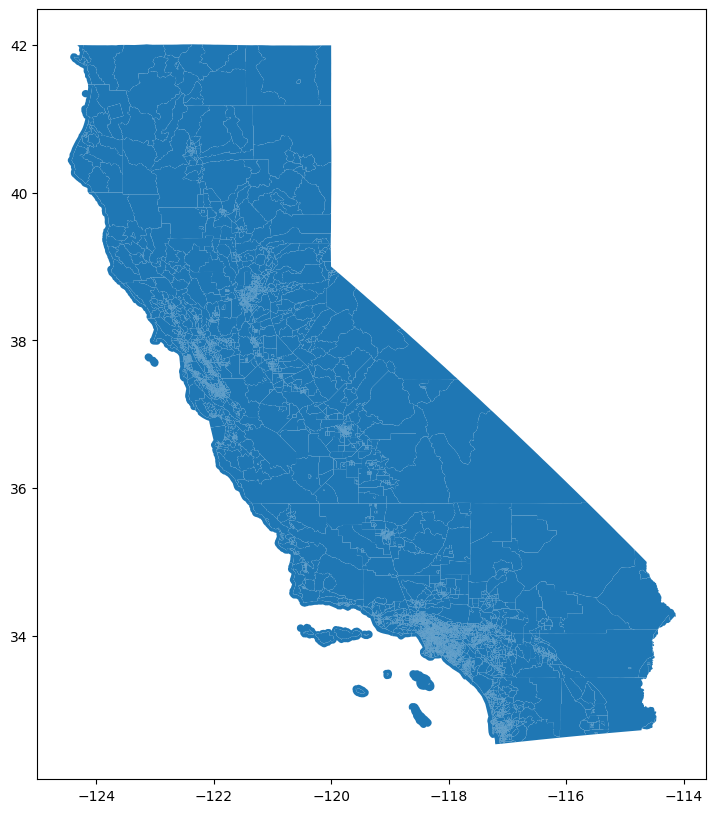

In [24]:
# Reference: geopandas.GeoDataFrame.plot [https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html]
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(10,10)
gdf.plot(ax=ax)
plt.show()

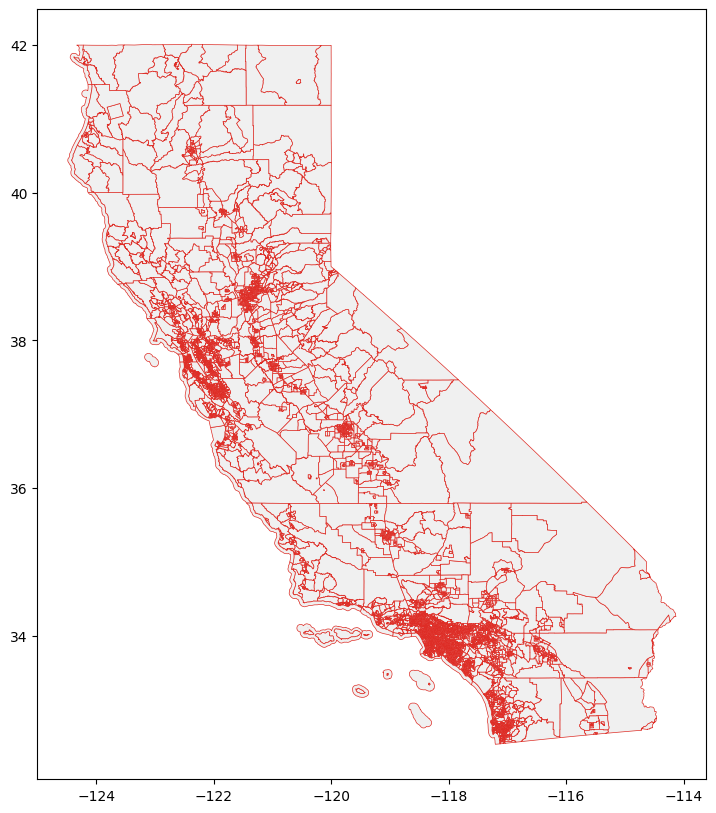

In [25]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(10,10)
gdf.plot(ax=ax, facecolor='#f0f0f0', edgecolor='#de2d26', linewidth=0.5) #facecolor: fill color, edgecolor: outline color, respectively, linewidth: stroke width

plt.show()

<Axes: >

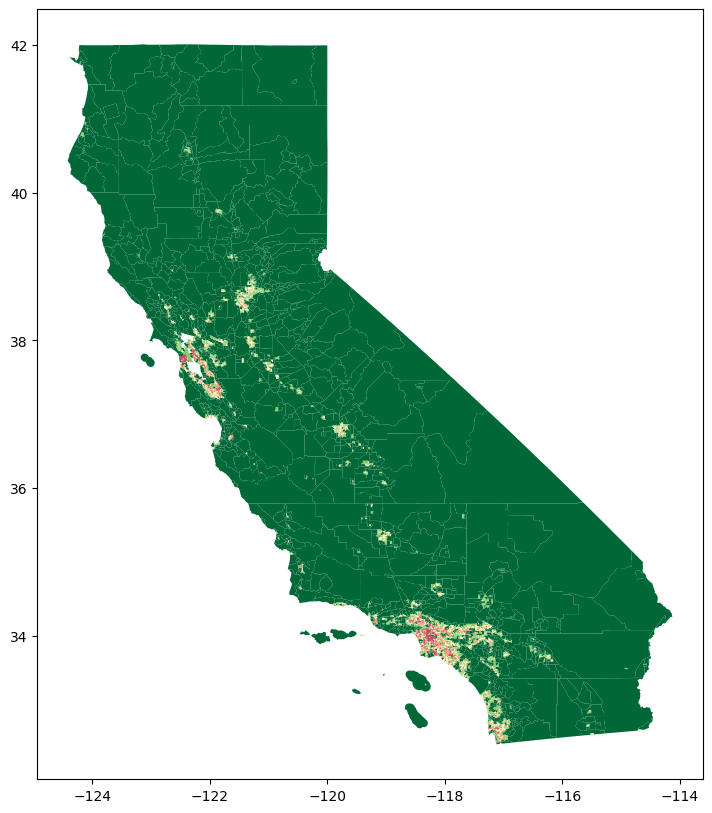

In [26]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(10,10)
gdf.plot(ax=ax, column='density', cmap='RdYlGn_r', scheme='quantiles') #cmap: color ramp , scheme: classification scheme, _r:to get a reversed version of that ramp

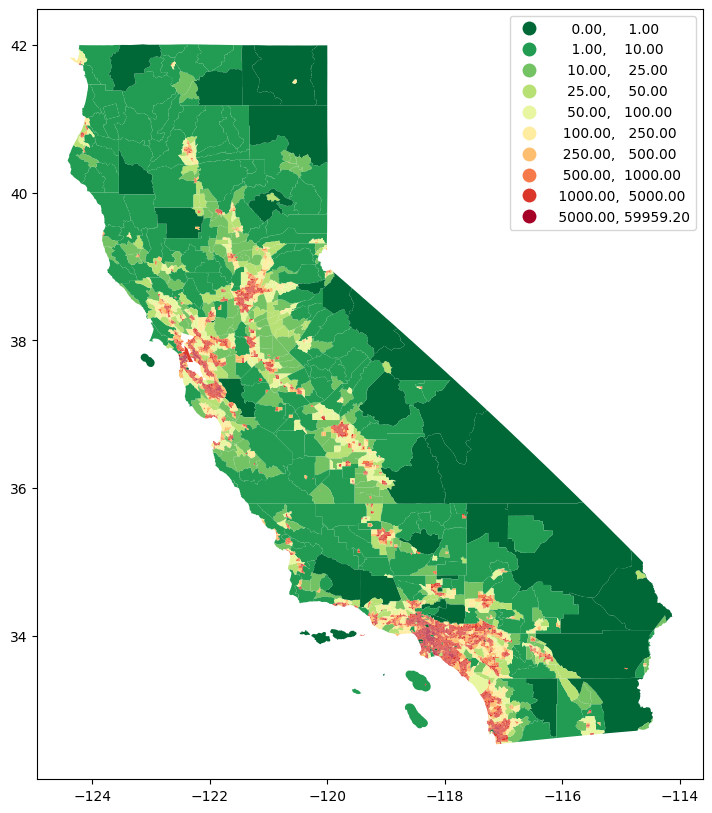

In [27]:
# The legend=True parameter adds a legend to our plot
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(10,10)

classification_kwds={
  'bins': [1,10,25,50,100, 250, 500, 1000, 5000]
}
gdf.plot(ax=ax, column='density', cmap='RdYlGn_r', scheme='User_Defined',
         classification_kwds=classification_kwds, legend=True) # classification_kwds: Keyword arguments to pass to mapclassify

plt.show()

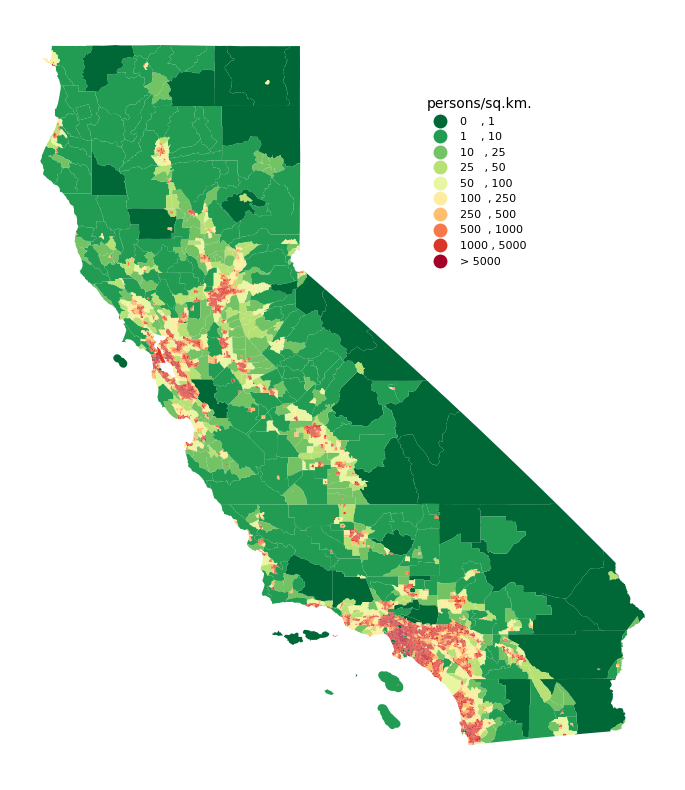

In [28]:
#We can supply legend customization options via the legend_kwds parameter and adjust the legend position, 
# formatting of the text, # and add a legend title. We can also manually adjust the legend entries, to give a more legible labels.
legend_kwds= { #dictionary To set up a legend
  'loc': 'upper right',
  'bbox_to_anchor': (0.8, 0.9), #Fine-tunes the position of the legend
  'fmt': '{:<5.0f}', #5 characters and displayed with no decimal 
  'frameon': False, #without a border
  'fontsize': 8,
  'title': 'persons/sq.km.'
}
classification_kwds={
  'bins':[1,10,25,50,100, 250, 500, 1000, 5000]
}

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(10,10)
gdf.plot(ax=ax, column='density', cmap='RdYlGn_r', scheme='User_Defined',
         classification_kwds=classification_kwds,
         legend=True, legend_kwds=legend_kwds)

ax.set_axis_off() # hides the axis lines and labels of the specified axes 

# Change the last entry in the legend to '>5000'
legend = ax.get_legend() #This retrieves the legend object associated with the specified axes (ax). 
legend.texts[-1].set_text('> 5000')

plt.show()

# Save as PNG

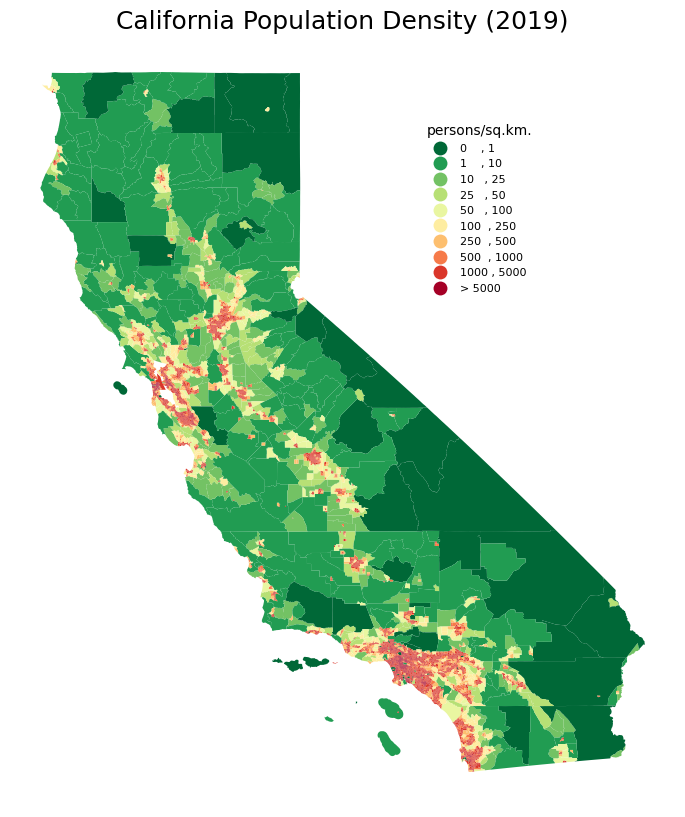

In [29]:
legend_kwds= {
  'loc': 'upper right',
  'bbox_to_anchor': (0.8, 0.9),
  'fmt': '{:<5.0f}',
  'frameon': False,
  'fontsize': 8,
  'title': 'persons/sq.km.'
}
classification_kwds={
  'bins':[1,10,25,50,100, 250, 500, 1000, 5000]
}

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(10,10)
gdf.plot(ax=ax, column='density', cmap='RdYlGn_r', scheme='User_Defined',
         classification_kwds=classification_kwds,
         legend=True, legend_kwds=legend_kwds)

ax.set_axis_off()

# Change the last entry in the legend to '>5000'
legend = ax.get_legend()
legend.texts[-1].set_text('> 5000')

# Add a title
ax.set_title('California Population Density (2019)', size = 18)

output_path = os.path.join(output_folder, 'california_pop.png')
plt.savefig(output_path, dpi=300)

#plt.show()

# Exercise

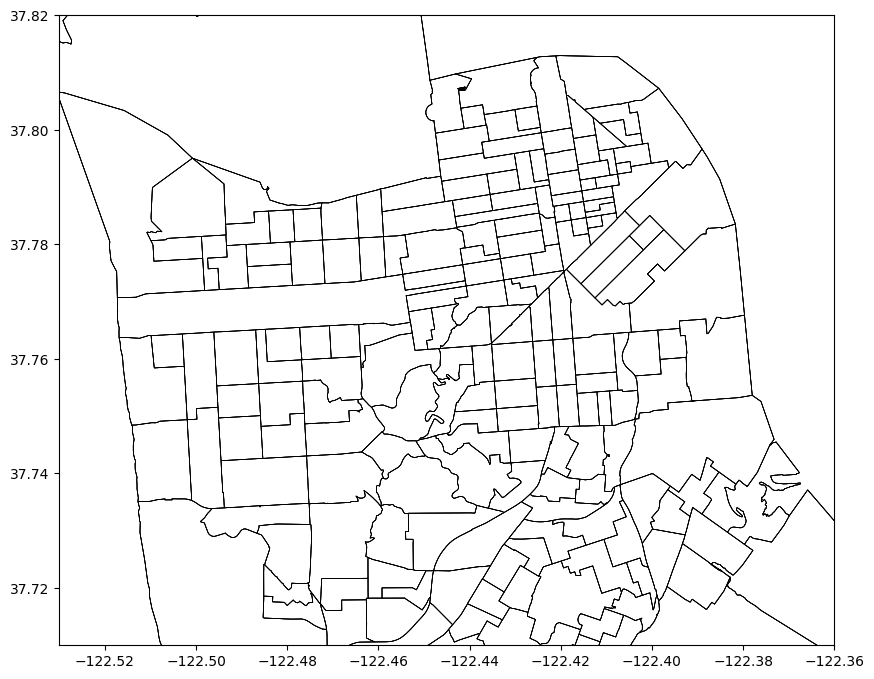

In [30]:
#Plot the census tracts geodataframe tracts with just outlines and no fill color.
#Display the map zoomed-in around the San Francisco area between Latitudes 
# from 37.71 to 37.82 and Longitudes from -122.53 to -122.36.

fig, ax = plt.subplots(1, 1, facecolor='white')
fig.set_size_inches(10, 10)

tracts.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=0.5)
gdf.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=0.5)

ax.set_xlim(-122.53, -122.36)
ax.set_ylim(37.71, 37.82)

ax.set_facecolor("white")

plt.show()


# ECUADOR

In [ ]:
geojson_name = 'ecuador.geojson'  # Adjust the name as necessary
data_folder = 'data'

In [69]:
geojson_name 

'ecuador.geojson'

In [78]:
# Create the directory if it doesn't exist
if not os.path.exists(data_folder):
    os.mkdir(data_folder)

# URL for downloading the GeoJSON file (you may need to check the exact URL)
data_url = 'https://geo.cepal.org/censo-ecuador/?indicator_id=14&members=40'  # Replace with the actual download link

# Function to download the GeoJSON file
def download_geojson(url):
    filename = os.path.join(data_folder, geojson_name)
    if not os.path.exists(filename):
        with requests.get(url, stream=True, allow_redirects=True) as r:
            with open(filename, 'wb') as f:
                f.write(r.content)
        print('Downloaded', filename)
    else:
        print('File already exists:', filename)

# Download the GeoJSON file
download_geojson(data_url + geojson_name) 

Downloaded data\ecuador.geojson


In [59]:
!pip install geojson

In [96]:
shapefile_path = os.path.join(data_folder, geojson_name)

In [124]:
file= "data/ecuador.geojson" 
tracts3 = gpd.read_file(file)
tracts3

,canton,id,name_es,name_en,value,source,qualitative_value,notes,label_value,geometry
0,0101,58,CUENCA,CUENCA,596101,3,None,,596.101,"MULTIPOLYGON (((-79.06084 -3.15006, -79.06333 ..."
1,0102,59,GIRÓN,GIRÓN,12182,3,None,,12.182,"MULTIPOLYGON (((-79.25329 -3.24079, -79.25684 ..."
2,1313,203,SANTA ANA,SANTA ANA,51462,3,None,,51.462,"MULTIPOLYGON (((-80.39506 -1.27594, -80.39644 ..."
3,0103,60,GUALACEO,GUALACEO,43188,3,None,,43.188,"MULTIPOLYGON (((-78.77364 -2.96896, -78.77308 ..."
4,0104,61,NABÓN,NABÓN,14776,3,None,,14.776,"MULTIPOLYGON (((-79.05428 -3.45392, -79.0552 -..."
...,...,...,...,...,...,...,...,...,...,...
216,0506,98,SAQUISILÍ,SAQUISILÍ,24356,3,None,,24.356,"MULTIPOLYGON (((-78.64857 -0.85982, -78.65081 ..."
217,0502,94,LA MANÁ,LA MANÁ,53793,3,None,,53.793,"MULTIPOLYGON (((-79.26122 -0.99434, -79.26156 ..."
218,0504,96,PUJILÍ,PUJILÍ,66980,3,None,,66.980,"MULTIPOLYGON (((-78.93404 -1.18747, -78.93369 ..."
219,0505,97,SALCEDO,SALCEDO,67493,3,None,,67.493,"MULTIPOLYGON (((-78.6461 -1.1358, -78.65004 -1..."


In [125]:
if tracts3.crs.is_geographic:
    tracts3 = tracts3.to_crs(epsg=3857)

In [126]:
Galapagos = ["SAN CRISTÓBAL", "SANTA CRUZ", "ISABELA"]
tracts3 = tracts3[~tracts3['name_es'].isin(Galapagos)]
print(tracts3['name_es'].unique())

['CUENCA' 'GIRÓN' 'SANTA ANA' 'GUALACEO' 'NABÓN' 'PAUTE' 'PUCARÁ'
 'SAN FERNANDO' 'SANTA ISABEL' 'CHORDELEG' 'SÍGSIG' 'OÑA' 'EL PAN'
 'GUACHAPALA' 'SEVILLA DE ORO' 'CAMILO PONCE ENRÍQUEZ' 'BALSAS' 'MACHALA'
 'ARENILLAS' 'HUAQUILLAS' 'ATAHUALPA' 'PALTAS' 'PUYANGO' 'SARAGURO'
 'CHILLA' 'EL GUABO' 'MARCABELÍ' 'PASAJE' 'PIÑAS' 'OLMEDO' 'MORONA'
 'GUALAQUIZA' 'LIMÓN INDANZA' 'PALORA' 'SANTIAGO' 'SUCÚA' 'PORTOVELO'
 'SANTA ROSA' 'ZARUMA' 'LOGROÑO' 'PABLO SEXTO' 'TIWINTZA' 'ZAMORA'
 'CHINCHIPE' 'NANGARITZA' 'YACUAMBI' 'YANTZAZA' 'LAS LAJAS' 'LOJA'
 'CALVAS' 'CATAMAYO' 'CELICA' 'EL TAMBO' 'CHAGUARPAMBA' 'ESPÍNDOLA'
 'GONZANAMÁ' 'MACARÁ' 'SOZORANGA' 'ZAPOTILLO' 'PINDAL' 'DÉLEG' 'QUILANGA'
 'SUSCAL' 'HUAMBOYA' 'SAN JUAN BOSCO' 'TAISHA' 'EL PANGUI'
 'CENTINELA DEL CÓNDOR' 'PALANDA' 'PAQUISHA' 'AZOGUES' 'BIBLIÁN' 'CAÑAR'
 'PALESTINA' 'LA TRONCAL' 'BABAHOYO' 'ALFREDO BAQUERIZO MORENO(JUJÁN)'
 'JARAMIJÓ' 'JIPIJAPA' 'EL CARMEN' 'CHONE' 'FLAVIO ALFARO' 'PICHINCHA'
 'PORTOVIEJO' 'BOLÍVAR' 'BALAO' 'BALZ

In [127]:
output_path= os.path.join(data_folder, 'ecuadorcontinental.geojson')
tracts3.to_file(output_path, driver='GeoJSON')

print(f'Archivo guardado como: {output_path}')

Archivo guardado como: data\ecuadorcontinental.geojson


In [128]:
output_path

'data\\ecuadorcontinental.geojson'

In [129]:
min_density = tracts3['value'].min()
max_density = tracts3['value'].max()

print("Densidad mínima:", min_density)
print("Densidad máxima:", max_density)

Densidad mínima: 2251
Densidad máxima: 2746403


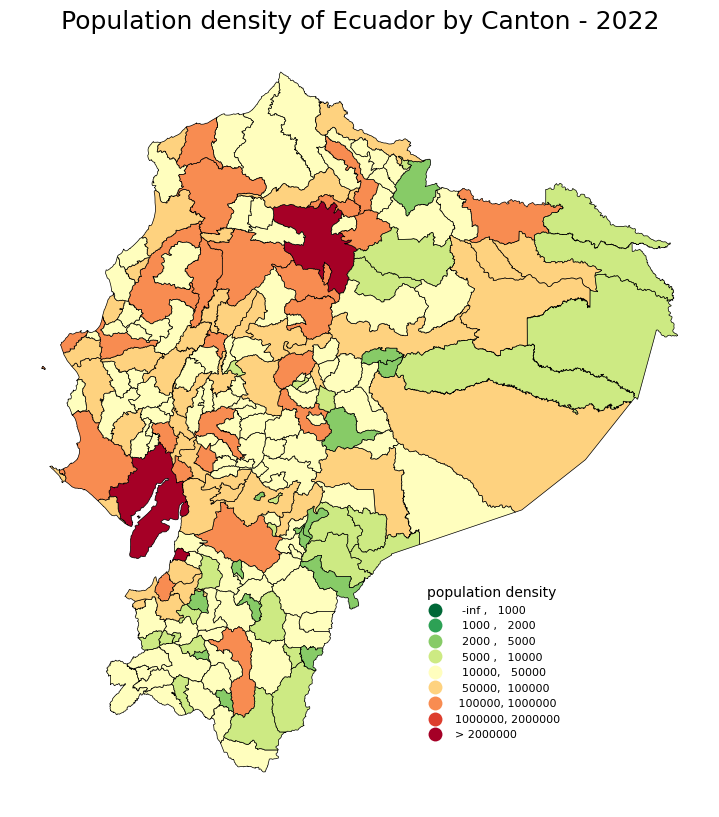

In [130]:
legend_kwds= {
  'loc': 'upper right',
  'bbox_to_anchor': (0.8, 0.3),
  'fmt': '{:<5.0f}',
  'frameon': False,
  'fontsize': 8,
  'title': 'population density'
}
classification_kwds={
  'bins':[ 1000, 2000,5000,10000,50000, 100000, 1000000, 2000000]
}

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(10,10)
tracts3.plot(ax=ax, column='value', cmap='RdYlGn_r', scheme='User_Defined', edgecolor='black', linewidth=0.5,
         classification_kwds=classification_kwds,
         legend=True, legend_kwds=legend_kwds)

ax.set_axis_off()

# Change the last entry in the legend to '>5000'
legend = ax.get_legend()
legend.texts[-1].set_text('> 2000000')

# Add a title
ax.set_title('Population density of Ecuador by Canton - 2022', size = 18)

output_path = os.path.join(output_folder, 'ecuador.png')
plt.savefig(output_path, dpi=300)

#plt.show()

